In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression , Lasso

In [98]:
data = pd.read_csv('/content/cardekho.csv')

In [99]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [100]:
data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [102]:
data = data.loc[data['selling_price']>=0]
data = data.loc[data['km_driven']>=0]
data = data.loc[data['year']>=0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 825.5+ KB


In [103]:
data['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [104]:
data.replace({'fuel':{'Petrol':0,'Diesel':1,'LPG':3,'CNG':2}},inplace=True)
data['fuel'].value_counts()

fuel
1    4402
0    3631
2      57
3      38
Name: count, dtype: int64

In [105]:
data['seller_type'].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [106]:
data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
data['seller_type'].value_counts()

seller_type
0    6766
1    1126
2     236
Name: count, dtype: int64

In [107]:
data['transmission'].value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [108]:
data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
data['transmission'].value_counts()

transmission
0    7078
1    1050
Name: count, dtype: int64

In [109]:
data['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [110]:
data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
data['owner'].value_counts()

owner
0    5289
1    2105
2     555
3     174
4       5
Name: count, dtype: int64

In [111]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7907 non-null   object 
 1   year                7907 non-null   int64  
 2   selling_price       7907 non-null   int64  
 3   km_driven           7907 non-null   int64  
 4   fuel                7907 non-null   int64  
 5   seller_type         7907 non-null   int64  
 6   transmission        7907 non-null   int64  
 7   owner               7907 non-null   int64  
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7907 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 803.1+ KB


In [114]:
data['max_power']=data['max_power'].replace(to_replace='bhp',value='',regex=True)
data['max_power']=data['max_power'].str.extract('(\d+)').astype(float)
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7906 non-null   object 
 1   year                7906 non-null   int64  
 2   selling_price       7906 non-null   int64  
 3   km_driven           7906 non-null   int64  
 4   fuel                7906 non-null   int64  
 5   seller_type         7906 non-null   int64  
 6   transmission        7906 non-null   int64  
 7   owner               7906 non-null   int64  
 8   mileage(km/ltr/kg)  7906 non-null   float64
 9   engine              7906 non-null   float64
 10  max_power           7906 non-null   float64
 11  seats               7906 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 803.0+ KB


In [115]:
x=data.drop(['name','selling_price'],axis=1)
y=data['selling_price']
corr=data.drop(['name'],axis=1).corr()

<Axes: >

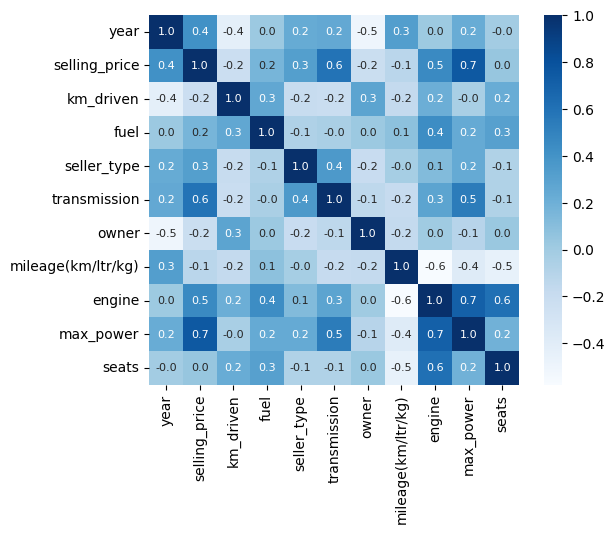

In [116]:
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [118]:
model_Lin = LinearRegression()
model_Lin.fit(x_train,y_train)

LinearRegression()

In [119]:
x_train_pred=model_Lin.predict(x_train)
r_error = metrics.r2_score(y_train,x_train_pred)
print('R squared error : ', r_error)

R squared error :  0.6721393081205485


In [120]:
x_test_pred=model_Lin.predict(x_test)
r_error = metrics.r2_score(y_test,x_test_pred)
print('R squared error : ', r_error)

R squared error :  0.6720752715401945


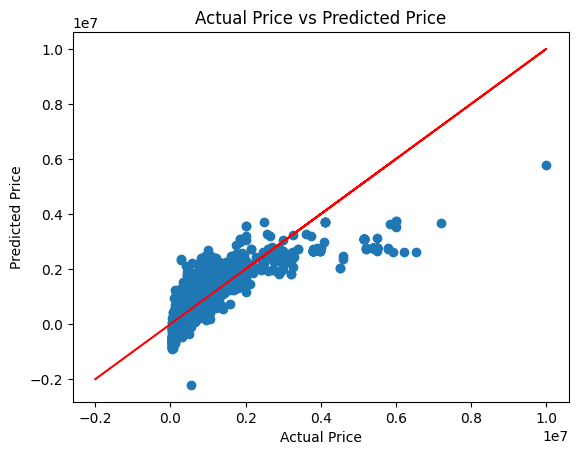

In [124]:
plt.scatter(y_train,x_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.plot([-2000000,0,10000000,2000000,6000000],[-2000000,0,10000000,2000000,6000000],color='red')
plt.show()

In [125]:
model_Lasso = Lasso()
model_Lasso.fit(x_train,y_train)

Lasso()

In [126]:
x_train_pred=model_Lasso.predict(x_train)
r_error = metrics.r2_score(y_train,x_train_pred)
print('R squared error : ', r_error)

R squared error :  0.6721393080786263


In [127]:
x_test_pred=model_Lasso.predict(x_test)
r_error = metrics.r2_score(y_test,x_test_pred)
print('R squared error : ', r_error)

R squared error :  0.6720751192487335


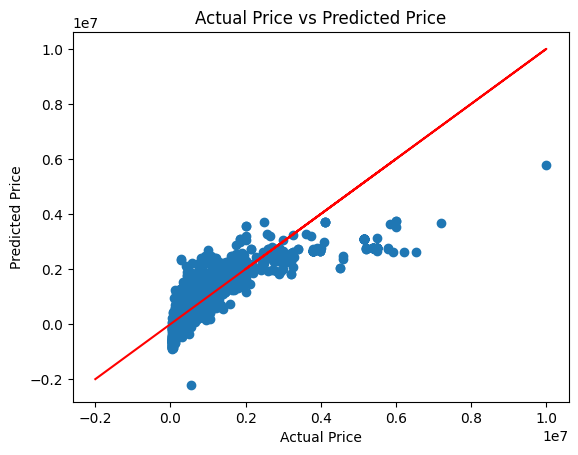

In [128]:
plt.scatter(y_train,x_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.plot([-2000000,0,10000000,2000000,6000000],[-2000000,0,10000000,2000000,6000000],color='red')
plt.show()